In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imshow

import dask
import dask.array as da

cle.set_wait_for_kernel_finish(True)

NAPARI_ASYNC=1

computing 5 4 87


C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


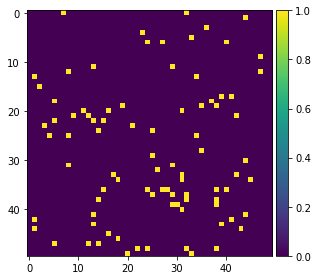

In [2]:
def data_generator(x=0, y=0, w=50, h=50):
    # pseudo-random point-pattern generation to have a reproducible dataset
    r = np.random.RandomState(x * y)
    coordinates = r.random((2, (x + 5) * (y + 5))) * np.asarray([[w],[h]])
    
    # create an image
    image = cle.create((h, w))
    # write at point coordinates
    cle.set(image, 0)
    cle.pointlist_to_labelled_spots(coordinates, image)
    
    # make binary image and retrieve from GPU
    result = cle.pull(image > 0)

    # for debugging; to see when the actual computation happens
    print("computing", x, y, np.sum(result))

    return result

example = data_generator(5, 4)

imshow(example)

In [3]:
def make_big_image(num_tiles_x=10, num_tiles_y=10, tile_width=50, tile_height=50):

    # we need to generate a single tile to know its shape and dtype
    example = data_generator()

    # setup the generator, which will be used many times to generate tiles
    delayed_generator = dask.delayed(data_generator)

    table = []
    for x in range(num_tiles_x):
        # set up a colum of tiles
        tiles = [delayed_generator(x, y, tile_width, tile_height) for y in range(num_tiles_y)]
        dask_tiles = [da.from_delayed(tile, shape=example.shape, dtype=example.dtype) for tile in tiles]
        column = da.concatenate(dask_tiles, axis=0)
        
        # collect column in a table
        table.append(column)

    # make a 2d tile dask array
    result = da.concatenate(table, axis=1)
    return result

big_image = make_big_image(num_tiles_x=50, num_tiles_y=50)
big_image

computing 0 0 25


dask.array<concatenate, shape=(2500, 2500), dtype=uint8, chunksize=(50, 50), chunktype=numpy.ndarray>

In [4]:
def process_image(image):
    print("blurring")
    return cle.pull(cle.gaussian_blur(image, sigma_x=1, sigma_y=2))

overlap_width = 5
processed_tiles = da.map_overlap(process_image, big_image, depth=overlap_width, boundary=0)
processed_tiles


blurring
blurring


dask.array<_trim, shape=(2500, 2500), dtype=float32, chunksize=(50, 50), chunktype=numpy.ndarray>

In [5]:
import napari
viewer = napari.Viewer()

viewer.add_image(example)

#viewer.add_image(big_image, cache=False, contrast_limits=[0, 1])

viewer.add_image(processed_tiles, cache=False, contrast_limits=[0, 1])

Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.


computing 0 49 245
computingcomputing 0 48 250
 1computing 48computing  297 1 49 312
2 49 353

computing 2 48 343
computing 3 49 384
computing 3 48 389
computing 4 48 439
blurring
blurring
blurring
computingcomputing 5 48 474
 computing 4 49 439
6 48 526
computing 6 49 529
computing 5 49 477
blurring
computing 7 49 572
computing 7 48 560
blurringblurring

computing 8 49 607
computingcomputing  9 48 642
8 48 603
blurring
computing 9 49 655
blurring
computing 11 49 750
computing 10 48 671
computing 12 48 756
computingcomputing 10 49 686
 blurring11 48 713

blurring
computing blurring12 49 770

computing 13 49 800
computing 13 48 802
blurring
computingcomputing 15 49 882
 computing computing14 48 827
 14 49 836
15 48 867
blurring
blurring
computing 16 48 906
blurring
computingcomputing  17 48 924
16computingcomputing  18 48 964
49 17 49 948
 905
computing 18 49 990
blurringblurring
computing
computing 19 48 992
 19 49 1002
blurring
computingcomputingcomputing 20 48 1021
 20 49 1028
 21 49

<Image layer 'processed_tiles' at 0x1e0d967f0d0>

In [6]:
viewer.add_image?

Signature:
viewer.add_image(
    data=None,
    *,
    channel_axis=None,
    rgb=None,
    colormap=None,
    contrast_limits=None,
    gamma=1,
    interpolation='nearest',
    rendering='mip',
    depiction='volume',
    iso_threshold=0.5,
    attenuation=0.05,
    name=None,
    metadata=None,
    scale=None,
    translate=None,
    rotate=None,
    shear=None,
    affine=None,
    opacity=1,
    blending=None,
    visible=True,
    multiscale=None,
    cache=True,
    plane=None,
    experimental_clipping_planes=None,
) -> 'Union[Image, List[Image]]'
Docstring:
Add an image layer to the layer list.

Parameters
----------
data : array or list of array
    Image data. Can be N >= 2 dimensional. If the last dimension has length
    3 or 4 can be interpreted as RGB or RGBA if rgb is `True`. If a
    list and arrays are decreasing in shape then the data is treated as
    a multiscale image. Please note multiscale rendering is only
    supported in 2D. In 3D, only the lowest resolution 

computingcomputing 4 0 44
 computing7 0 60
 0 0 25
computing 1 0 30
computing 5 0 50
computing 3 0 39
computingcomputingcomputing 8 0 65
computing 13 0 89
  computingcomputing 11 0 80
 10 0 75
912computing 0 83
computingcomputing 15 computing 14 0 94
  6 0 52
0 0 69
2 0 35
 98
computing 18 0 111
computingcomputing 20 0 123
computing computing 22 0 131
17 0 110
 16 0 102
computing 21 0 128
computing 19computing 0 116
computing 27 0computing 158
computing  31 0 173
computing 30 0 170
computing 23 25 0 149
26 0 150
computing 24 0 140
 0 135
computing 29 0 168
computing 28 0 156
computing 32 0 179
computing 34 0 188
computingcomputingcomputing computing 33 0 187
 44 0 238
computing  42 0 227
37 0 199
35computingcomputing 40 0 212
computing   0 197
4139 computing0 222
 0 214
 36 0 200
computing 45 0 236
computing 38 0 208
computing 46 0 247
computing 47 0 250
computing 43 0 233
computing 48 0 250
computingcomputing 49 0 245
 0 1 30
computingcomputing 4 1 53
 1 computing 2 1 41
1 36
computin

Low image data range; displaying image with stretched contrast.


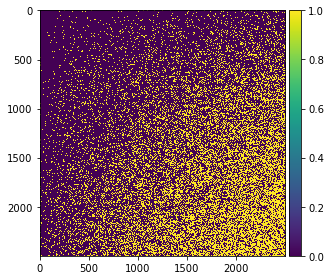

In [7]:
image = np.asarray(big_image)
print(np.sum(image))
imshow(image)

In [8]:
print(NAPARI_ASYNC)

1
